In [161]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [162]:
# read data and add column names
data=pd.read_csv("./adult.data",header=None)
data.columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
data.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [164]:
# check for null values
data.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [165]:
# delete lines with '?'
data.replace(' ?', np.nan,inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30162 non-null  int64 
 1   workclass        30162 non-null  object
 2   fnlwgt           30162 non-null  int64 
 3   education        30162 non-null  object
 4   educational-num  30162 non-null  int64 
 5   marital-status   30162 non-null  object
 6   occupation       30162 non-null  object
 7   relationship     30162 non-null  object
 8   race             30162 non-null  object
 9   gender           30162 non-null  object
 10  capital-gain     30162 non-null  int64 
 11  capital-loss     30162 non-null  int64 
 12  hours-per-week   30162 non-null  int64 
 13  native-country   30162 non-null  object
 14  income           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [166]:
# remove duplicate rows
print("Before removing duplicates:", data.duplicated().sum())
data = data[~data.duplicated()]
print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 23
After removing duplicates: 0


In [167]:
data['income'].value_counts()

 <=50K    22633
 >50K      7506
Name: income, dtype: int64

In [168]:
# apply data normalisation to int64 variables
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
for col in numeric_cols:
    data[col] = scaler.fit_transform(data[[col]])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30139 non-null  float64
 1   workclass        30139 non-null  object 
 2   fnlwgt           30139 non-null  float64
 3   education        30139 non-null  object 
 4   educational-num  30139 non-null  float64
 5   marital-status   30139 non-null  object 
 6   occupation       30139 non-null  object 
 7   relationship     30139 non-null  object 
 8   race             30139 non-null  object 
 9   gender           30139 non-null  object 
 10  capital-gain     30139 non-null  float64
 11  capital-loss     30139 non-null  float64
 12  hours-per-week   30139 non-null  float64
 13  native-country   30139 non-null  object 
 14  income           30139 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [169]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.042516,State-gov,-1.062676,Bachelors,1.128996,Never-married,Adm-clerical,Not-in-family,White,Male,0.145925,-0.218673,-0.078031,United-States,<=50K
1,0.880215,Self-emp-not-inc,-1.007829,Bachelors,1.128996,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.147502,-0.218673,-2.332060,United-States,<=50K
2,-0.033639,Private,0.244669,HS-grad,-0.440434,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.147502,-0.218673,-0.078031,United-States,<=50K
3,1.108678,Private,0.425206,11th,-1.225149,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.147502,-0.218673,-0.078031,United-States,<=50K
4,-0.795183,Private,1.406572,Bachelors,1.128996,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.147502,-0.218673,-0.078031,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.871338,Private,0.638926,Assoc-acdm,0.736639,Married-civ-spouse,Tech-support,Wife,White,Female,-0.147502,-0.218673,-0.244996,United-States,<=50K
32557,0.118670,Private,-0.335246,HS-grad,-0.440434,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.147502,-0.218673,-0.078031,United-States,>50K
32558,1.489450,Private,-0.358567,HS-grad,-0.440434,Widowed,Adm-clerical,Unmarried,White,Female,-0.147502,-0.218673,-0.078031,United-States,<=50K
32559,-1.252110,Private,0.110688,HS-grad,-0.440434,Never-married,Adm-clerical,Own-child,White,Male,-0.147502,-0.218673,-1.747682,United-States,<=50K


In [170]:
# encoding of integer values for object categories
class_le = LabelEncoder()
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in cat_cols:
    data[col] = class_le.fit_transform(data[col].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              30139 non-null  float64
 1   workclass        30139 non-null  int64  
 2   fnlwgt           30139 non-null  float64
 3   education        30139 non-null  int64  
 4   educational-num  30139 non-null  float64
 5   marital-status   30139 non-null  int64  
 6   occupation       30139 non-null  int64  
 7   relationship     30139 non-null  int64  
 8   race             30139 non-null  int64  
 9   gender           30139 non-null  int64  
 10  capital-gain     30139 non-null  float64
 11  capital-loss     30139 non-null  float64
 12  hours-per-week   30139 non-null  float64
 13  native-country   30139 non-null  int64  
 14  income           30139 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.7 MB


In [171]:
# changing dataframe to tensor
X = torch.tensor(np.concatenate(data.values), dtype=torch.float)
X = X.view(30139, 15)
#spilt
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
# define the Dataset class
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index]

# loading the data
#num_workers should be 0 or 1, otherwise DataLoader worker (pid(s) 91713, 91714) exited unexpectedly
train_dataset_X = MyDataset(X_train)
train_loader_X = DataLoader(dataset=train_dataset_X, batch_size=32, shuffle=True, num_workers=0)

test_dataset_X = MyDataset(X_test)
test_loader_X = DataLoader(dataset=test_dataset_X, batch_size=32, shuffle=True, num_workers=0)
# test_dataset_y = MyDataset(y_test)
# test_loader_y = DataLoader(dataset=test_dataset_y, batch_size=32, shuffle=True, num_workers=0)

#check the size
print(len(test_dataset_X))
sample = train_dataset_X[0]  
sample2 = test_dataset_X[0]
print(sample.shape)  
print(sample2.shape)

6028
torch.Size([15])
torch.Size([15])


In [332]:
import torch.nn as nn
#define the model
#construct the network
model = nn.Sequential(
    nn.Linear(14, 200), # input layer
    nn.ReLU(), # activation functionLeaky
    nn.Linear(200, 400), # first hidden layer
    nn.LeakyReLU(), # activation function
    nn.Linear(400, 400), # second hidden layer
    nn.LeakyReLU(), # activation function
    nn.Linear(400, 400), # third hidden layer
    nn.ReLU(), # activation function
    nn.Linear(400, 2)) # output layer


In [333]:
# Define the loss function and optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.99)
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.9, weight_decay=1e-5)
# import torch.optim as optim
# optimizer = optim.AdamW(model.parameters(), lr=1e-5)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.65)
criterium = nn.CrossEntropyLoss()

#define the compute_loss_validation function
def compute_loss_validation(model):
    model.eval()
    tot_loss = 0
    batch_size = test_loader_X.batch_size
    for i, batch in enumerate(test_loader_X):
        xs = batch[:,:-1]
#        xs = batch
#        print(xs.shape)
#         print(xs)
        ys = batch[:,-1].clamp(max=1).long()

        pred_ys = model(xs) # generate the predictions using the model
        loss = criterium(pred_ys, ys) # evaluate the predictions using the cross entropy loss
        tot_loss += loss.item() # get the number and sum it to the total loss

        if (i+1) % batch_size == 0:
            break

    loss = tot_loss / batch_size # normalize the loss based on the number of testing examples
    return loss

In [334]:
import torch.nn.functional as F
epochs = 10 # how many times you want to train on the dataset
model.train() # set the model to training mode

# these variables are used to store the losses
running_loss = 0
training_loss = []
validating_loss = []


# loop over the epochs
for epoch in range(epochs):
    batch_size = train_loader_X.batch_size
    # loop over the batches
    for i, batch in enumerate(train_loader_X):
        model.train()
        batch = torch.tensor(batch)
        xs = batch[:, :-1]
#        print(xs.shape)
        ys = batch[:,-1].clamp(max=1).long()
#         print(xs)
#         ys = F.softmax(batch[:,-1], dim=1).long()
#        print(ys)


        optimizer.zero_grad() # reset the gradients
        pred_ys = model(xs) # generate the predictions
#         print(pred_ys)
        loss = criterium(pred_ys, ys) # compute the loss
        loss.backward() # backpropagation
        optimizer.step() # optmizes here

        running_loss += loss.item()
        if (i+1) % 20 == 0: # every 100 batches print statistics about the training
            running_loss /= 20 # training loss on the last batch
            training_loss.append(running_loss) # keep track of the training loss
            model.eval() # set the model to eval, we can now test the model
            validation_loss = compute_loss_validation(model) # compute the validation loss
            validating_loss.append(validation_loss) # keep track of the validation loss
            print('Epoch [%d/%d], Step [%d/%d], Train Loss: %.4f, Validation Loss: %.4f'%(
              epoch+1,
              epochs,
              i+1,
              len(train_dataset_X)//batch_size, running_loss, validation_loss))
            running_loss = 0

/var/folders/0x/66fq_8ls2qvdfwvlvcw1hxgh0000gn/T/ipykernel_86887/10087694.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch)


Epoch [1/10], Step [20/753], Train Loss: 0.6106, Validation Loss: 0.5906
Epoch [1/10], Step [40/753], Train Loss: 0.5575, Validation Loss: 0.5747
Epoch [1/10], Step [60/753], Train Loss: 0.5585, Validation Loss: 0.6012
Epoch [1/10], Step [80/753], Train Loss: 0.5333, Validation Loss: 0.6377
Epoch [1/10], Step [100/753], Train Loss: 0.5625, Validation Loss: 0.5428
Epoch [1/10], Step [120/753], Train Loss: 0.5556, Validation Loss: 0.5489
Epoch [1/10], Step [140/753], Train Loss: 0.5514, Validation Loss: 0.5049
Epoch [1/10], Step [160/753], Train Loss: 0.4882, Validation Loss: 0.5303
Epoch [1/10], Step [180/753], Train Loss: 0.5118, Validation Loss: 0.5500
Epoch [1/10], Step [200/753], Train Loss: 0.5194, Validation Loss: 0.5478
Epoch [1/10], Step [220/753], Train Loss: 0.5092, Validation Loss: 0.4749
Epoch [1/10], Step [240/753], Train Loss: 0.4749, Validation Loss: 0.4575
Epoch [1/10], Step [260/753], Train Loss: 0.4914, Validation Loss: 0.4472
Epoch [1/10], Step [280/753], Train Loss: 

Epoch [4/10], Step [20/753], Train Loss: 0.6078, Validation Loss: 0.3506
Epoch [4/10], Step [40/753], Train Loss: 0.3623, Validation Loss: 0.4319
Epoch [4/10], Step [60/753], Train Loss: 0.4000, Validation Loss: 0.3522
Epoch [4/10], Step [80/753], Train Loss: 0.3686, Validation Loss: 0.3533
Epoch [4/10], Step [100/753], Train Loss: 0.3251, Validation Loss: 0.3571
Epoch [4/10], Step [120/753], Train Loss: 0.3986, Validation Loss: 0.3725
Epoch [4/10], Step [140/753], Train Loss: 0.4012, Validation Loss: 0.3530
Epoch [4/10], Step [160/753], Train Loss: 0.3980, Validation Loss: 0.3543
Epoch [4/10], Step [180/753], Train Loss: 0.3757, Validation Loss: 0.3748
Epoch [4/10], Step [200/753], Train Loss: 0.3524, Validation Loss: 0.3426
Epoch [4/10], Step [220/753], Train Loss: 0.3885, Validation Loss: 0.4041
Epoch [4/10], Step [240/753], Train Loss: 0.3911, Validation Loss: 0.3542
Epoch [4/10], Step [260/753], Train Loss: 0.3499, Validation Loss: 0.3399
Epoch [4/10], Step [280/753], Train Loss: 

Epoch [7/10], Step [40/753], Train Loss: 0.3514, Validation Loss: 0.3782
Epoch [7/10], Step [60/753], Train Loss: 0.3558, Validation Loss: 0.3467
Epoch [7/10], Step [80/753], Train Loss: 0.3467, Validation Loss: 0.3690
Epoch [7/10], Step [100/753], Train Loss: 0.3529, Validation Loss: 0.3484
Epoch [7/10], Step [120/753], Train Loss: 0.3609, Validation Loss: 0.3204
Epoch [7/10], Step [140/753], Train Loss: 0.3154, Validation Loss: 0.3436
Epoch [7/10], Step [160/753], Train Loss: 0.2823, Validation Loss: 0.3655
Epoch [7/10], Step [180/753], Train Loss: 0.3525, Validation Loss: 0.3540
Epoch [7/10], Step [200/753], Train Loss: 0.3488, Validation Loss: 0.3374
Epoch [7/10], Step [220/753], Train Loss: 0.3994, Validation Loss: 0.3455
Epoch [7/10], Step [240/753], Train Loss: 0.3638, Validation Loss: 0.3976
Epoch [7/10], Step [260/753], Train Loss: 0.3697, Validation Loss: 0.3665
Epoch [7/10], Step [280/753], Train Loss: 0.3740, Validation Loss: 0.3298
Epoch [7/10], Step [300/753], Train Loss:

Epoch [10/10], Step [40/753], Train Loss: 0.3393, Validation Loss: 0.3363
Epoch [10/10], Step [60/753], Train Loss: 0.3548, Validation Loss: 0.3524
Epoch [10/10], Step [80/753], Train Loss: 0.3517, Validation Loss: 0.3735
Epoch [10/10], Step [100/753], Train Loss: 0.3986, Validation Loss: 0.3493
Epoch [10/10], Step [120/753], Train Loss: 0.3484, Validation Loss: 0.3498
Epoch [10/10], Step [140/753], Train Loss: 0.3646, Validation Loss: 0.3387
Epoch [10/10], Step [160/753], Train Loss: 0.3165, Validation Loss: 0.3195
Epoch [10/10], Step [180/753], Train Loss: 0.3452, Validation Loss: 0.3568
Epoch [10/10], Step [200/753], Train Loss: 0.3750, Validation Loss: 0.3369
Epoch [10/10], Step [220/753], Train Loss: 0.3610, Validation Loss: 0.3179
Epoch [10/10], Step [240/753], Train Loss: 0.3334, Validation Loss: 0.3410
Epoch [10/10], Step [260/753], Train Loss: 0.3202, Validation Loss: 0.3725
Epoch [10/10], Step [280/753], Train Loss: 0.3403, Validation Loss: 0.3519
Epoch [10/10], Step [300/753

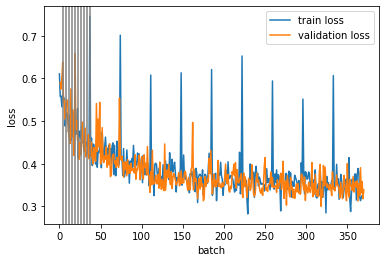

In [335]:
import matplotlib.pyplot as plt
training_loss.pop()
validating_loss.insert(0, float('NaN'))
plt.plot(training_loss, label="train loss")
plt.plot(validating_loss, label="validation loss")
plt.legend(loc='upper right')

for i in range(epochs):
    plt.axvline(x=(len(train_dataset_X)//batch_size)*(i+1)/200,color='gray')

plt.ylabel('loss');
plt.xlabel('batch')
plt.show()

In [336]:
def accuracy(data_loader):
    correct = 0.0 # here you will count the correct answers
    total = 0.0 # here you will count all the answers
    with torch.no_grad(): # ingnore the gradient graph
        for batch in data_loader:
            batch = torch.tensor(batch)
            xs = batch[:, :-1]
    #        print(xs.shape)
            ys = batch[:,-1].clamp(max=1).long()

            hat_ys = model(xs).detach().cpu()
            _, hat_ys = torch.max(hat_ys, 1)
            correct += (hat_ys == ys).sum()
            total += ys.size(0)

    return correct/total

In [337]:
model.eval() # set the model to evaluation

train_accuracy = accuracy(train_loader_X)
print('Train accuracy of the MLP {:.3f}'.format(train_accuracy))

validation_accuracy = accuracy(test_loader_X)
print('Validation accuracy of the MLP {:.3f}'.format(validation_accuracy))

/var/folders/0x/66fq_8ls2qvdfwvlvcw1hxgh0000gn/T/ipykernel_86887/796367905.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = torch.tensor(batch)


Train accuracy of the MLP 0.843
Validation accuracy of the MLP 0.843
